<a href="https://colab.research.google.com/github/AnaghBDeshpande/-6thSem-ML-Lab-/blob/main/Lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Dataset
data = {
    'Height (cm)': [165, 172, 158, 185, 170, 162, 175, 168, 180, 155, 167, 182, 173, 160, 178],
    'Weight (kg)': [62, 75, 58, 90, 68, 60, 77, 65, 85, 52, 63, 88, 72, 55, 80],
    'Blood Pressure (mmHg)': [120, 125, 115, 140, 122, 118, 130, 121, 135, 112, 119, 138, 127, 116, 132]
}

df = pd.DataFrame(data)

# Prepare data
X = df[['Height (cm)', 'Weight (kg)']]
y = df['Blood Pressure (mmHg)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Linear Regression Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Print coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Height coefficient: {model.coef_[0]:.4f}")
print(f"Weight coefficient: {model.coef_[1]:.4f}")

# Example prediction
new_data = [[170, 70]]
new_pred = model.predict(new_data)
print(f"\nPredicted Blood Pressure for height 170cm, weight 70kg: {new_pred[0]:.1f} mmHg")

Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 1.01
Mean Squared Error (MSE): 1.04
Root Mean Squared Error (RMSE): 1.02

Model Coefficients:
Intercept: 32.87
Height coefficient: 0.3534
Weight coefficient: 0.4503

Predicted Blood Pressure for height 170cm, weight 70kg: 124.5 mmHg


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Random Forest

Dataset with Classes:
    Height (cm)  Weight (kg)  Blood Pressure (mmHg) BP_Class
0           165           62                    120   Normal
1           172           75                    125   Normal
2           158           58                    115   Normal
3           185           90                    140     High
4           170           68                    122   Normal
5           162           60                    118   Normal
6           175           77                    130     High
7           168           65                    121   Normal
8           180           85                    135     High
9           155           52                    112   Normal
10          167           63                    119   Normal
11          182           88                    138     High
12          173           72                    127   Normal
13          160           55                    116   Normal
14          178           80                    132     High

C

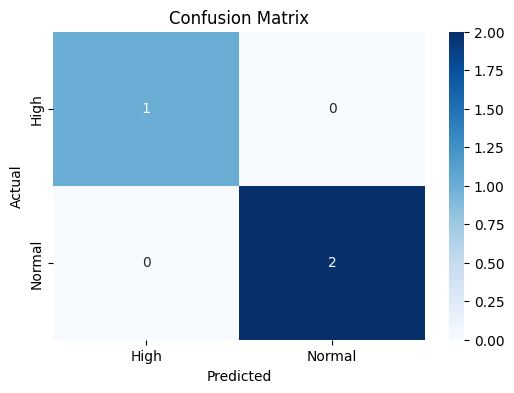


Predicted Classes for new data:
Height: 170 cm, Weight: 70 kg → Predicted Class: Normal
Height: 160 cm, Weight: 55 kg → Predicted Class: Normal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Height (cm)': [165, 172, 158, 185, 170, 162, 175, 168, 180, 155, 167, 182, 173, 160, 178],
    'Weight (kg)': [62, 75, 58, 90, 68, 60, 77, 65, 85, 52, 63, 88, 72, 55, 80],
    'Blood Pressure (mmHg)': [120, 125, 115, 140, 122, 118, 130, 121, 135, 112, 119, 138, 127, 116, 132]
}

df = pd.DataFrame(data)

df['BP_Class'] = ['High' if x >= 130 else 'Normal' for x in df['Blood Pressure (mmHg)']]

print("Dataset with Classes:")
print(df)

X = df[['Height (cm)', 'Weight (kg)']]
y = df['BP_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_data = [[170, 70], [160, 55]]
new_pred = rf_model.predict(new_data)
print("\nPredicted Classes for new data:")
for i, pred in enumerate(new_pred):
    print(f"Height: {new_data[i][0]} cm, Weight: {new_data[i][1]} kg → Predicted Class: {pred}")

Support Vector Machine


SVM Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
      Normal       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]


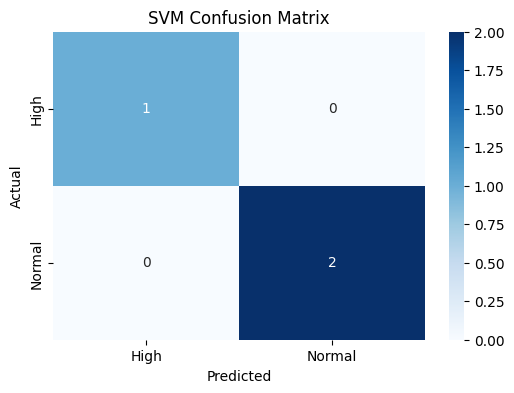


New Class Predictions:
Case 1: Normal
Case 2: Normal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df['BP_Class'] = ['High' if x >= 130 else 'Normal' for x in df['Blood Pressure (mmHg)']]

X = df[['Height (cm)', 'Weight (kg)']]
y = df['BP_Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_clf.classes_,
            yticklabels=svm_clf.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

new_data = scaler.transform([[170, 70], [160, 55]])
new_pred = svm_clf.predict(new_data)
print("\nNew Class Predictions:")
for i, pred in enumerate(new_pred):
    print(f"Case {i+1}: {pred}")